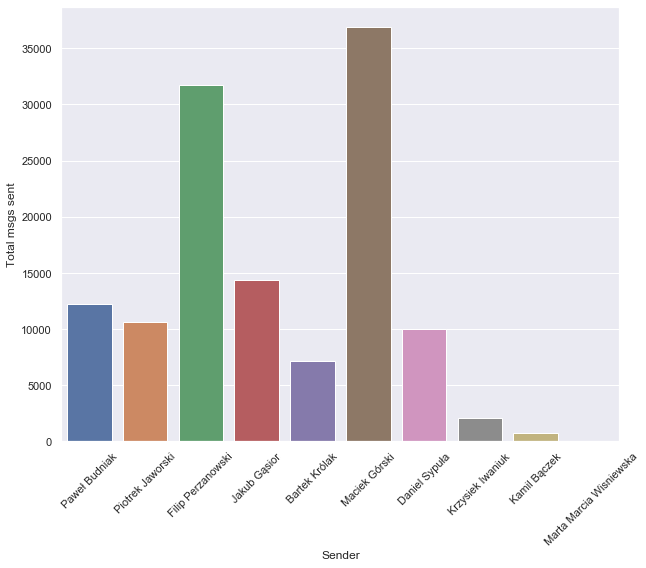

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import stats_pandas as stats
import pandas as pd
import seaborn as sns

sklad = r'D:\facebook html i json\skladczarnuchow_9ZWCplP1iw'
json_chat = R'data\skladczarnuchow.json'
PATH = sklad

#chat = stats.load_json(json_chat)
chat = stats.load_from_path(PATH)
msg_stats = stats.get_msg_stats(chat)
df = pd.DataFrame(((k,*v) for k,v in msg_stats.items()))
df.columns = ['Sender', 'Total msgs sent', 'Avg msg length', 'Total chars sent']
sns.set(rc={'figure.figsize':(10,8)})
ax = sns.barplot(x='Sender', y='Total msgs sent', data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation =45)
ax

## Znaki wysłane razem

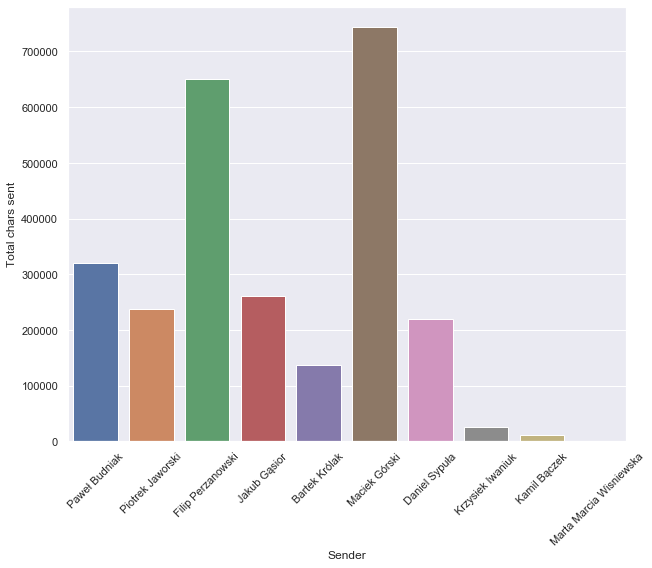

In [4]:
bar = sns.barplot(x='Sender', y='Total chars sent', data = df)
bar.set_xticklabels(bar.get_xticklabels(), rotation =45)
sns.set(rc={'figure.figsize':(10,8)})
bar

## Znaki na wiadomość

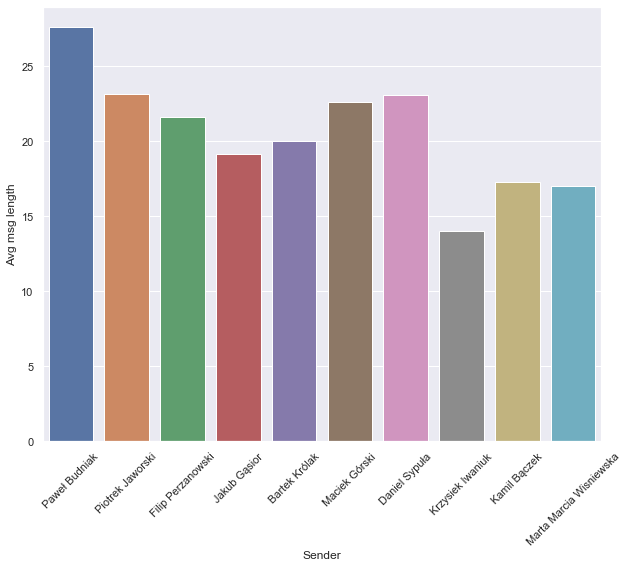

In [4]:
bar2 = sns.barplot(x='Sender', y='Avg msg length', data = df)
bar2.set_xticklabels(bar2.get_xticklabels(), rotation =45)
sns.set(rc={'figure.figsize':(10,8)})
plt.show()

## Licznik wyrazów
Poniżej można zmienić minimalną długość słowa.

In [5]:
#ksywy = ['debesciak', 'pierdziano', 'czlowiek', 'wielkiego', 'szacunku', 'glawiator', 'tajtisów', 'klawy', 'ziom3q']

#### do zmiany
min_word_length = 5 #minimalna długość wyrazu
#### do zmiany 

word_counts = stats.get_word_counts(chat, filter_participants_names = True, exclude_words = None)
word_counts_filtered = {}
for sender in word_counts:
    word_counts_filtered[sender] = {k:v for k,v in word_counts[sender].items() if len(k)>=min_word_length}
#remove dictionaries emptied by the above filter:
word_counts_filtered = {k:v for k,v in word_counts_filtered.items() if v}

D:\Anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 55357 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:211: RuntimeWarning: Glyph 56394 missing from current font.
  font.set_text(s, 0.0, flags=flags)
D:\Anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 55357 missing from current font.
  font.set_text(s, 0, flags=flags)
D:\Anaconda\lib\site-packages\matplotlib\backends\backend_agg.py:180: RuntimeWarning: Glyph 56394 missing from current font.
  font.set_text(s, 0, flags=flags)


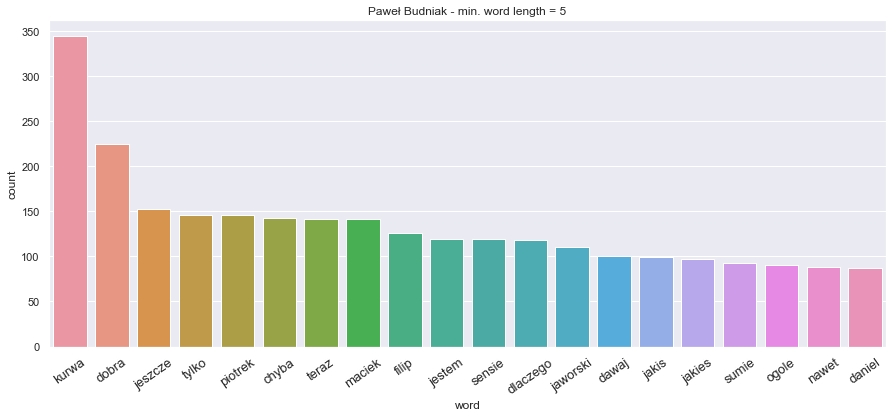

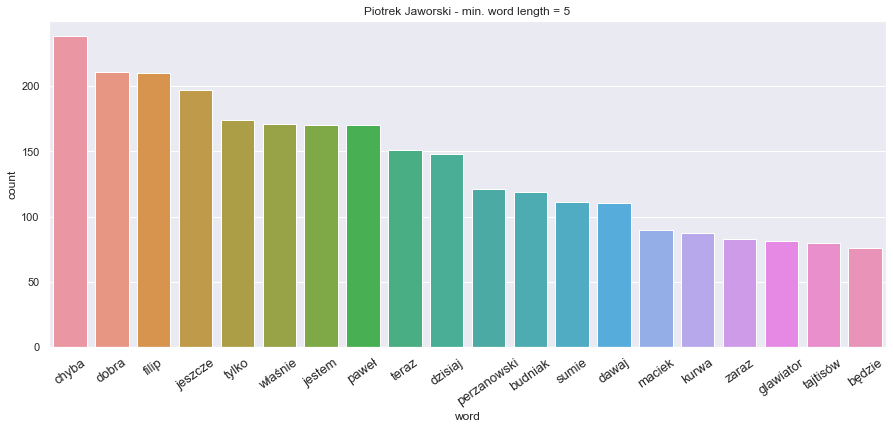

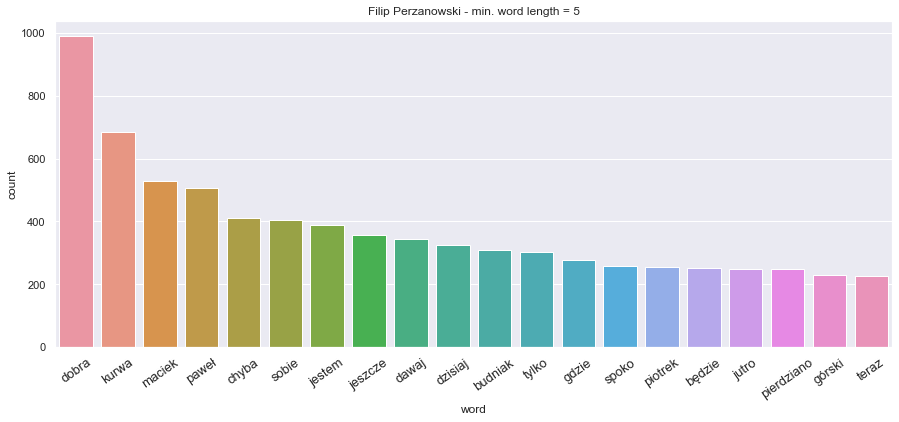

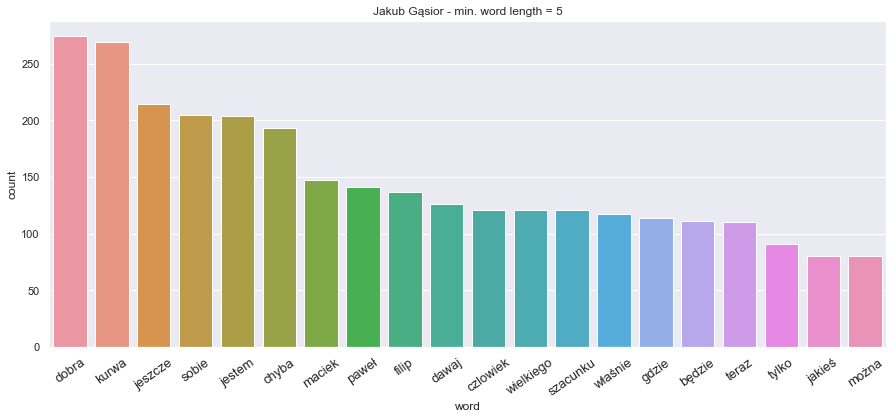

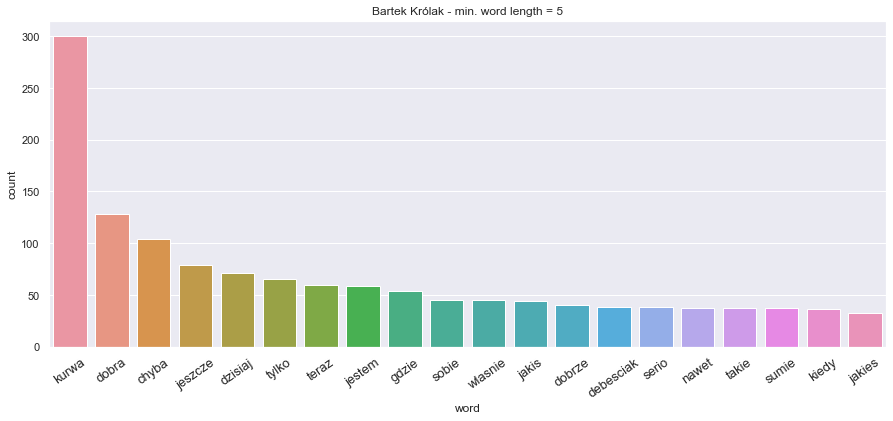

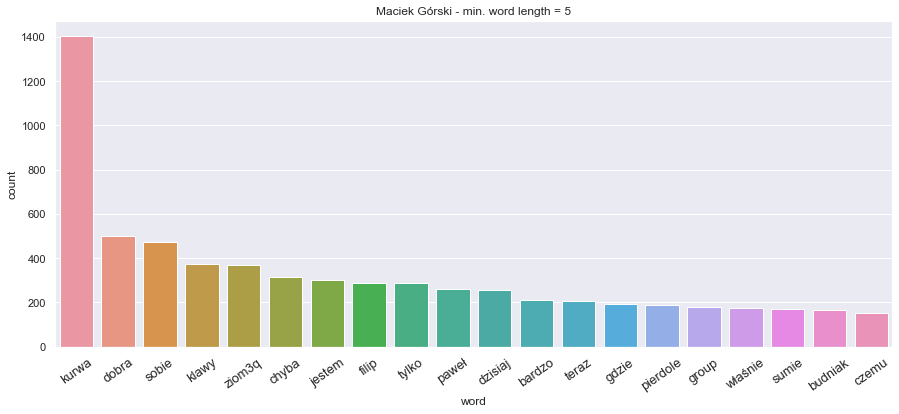

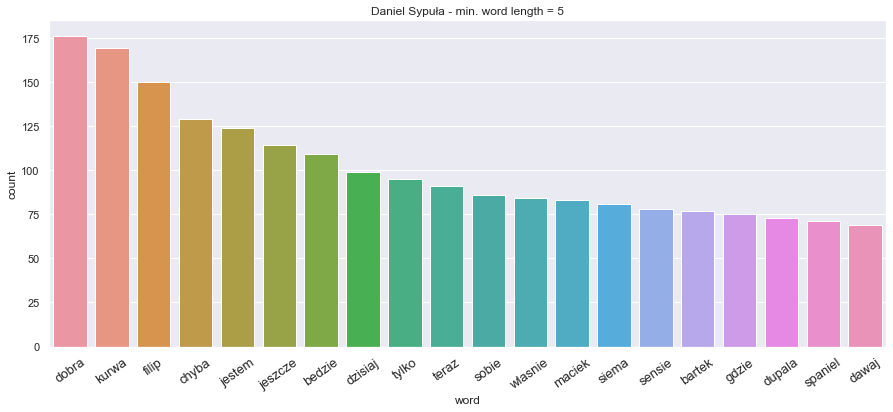

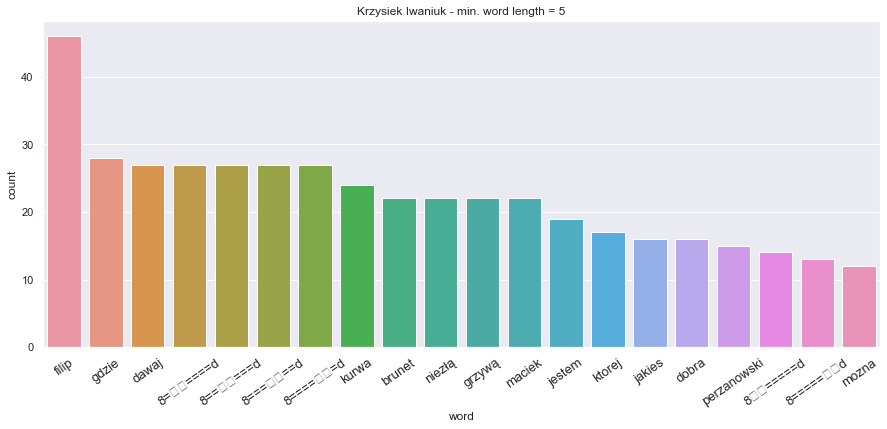

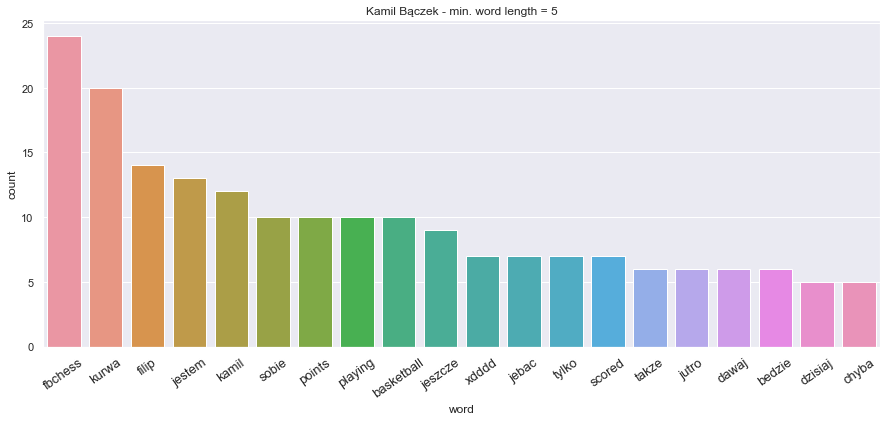

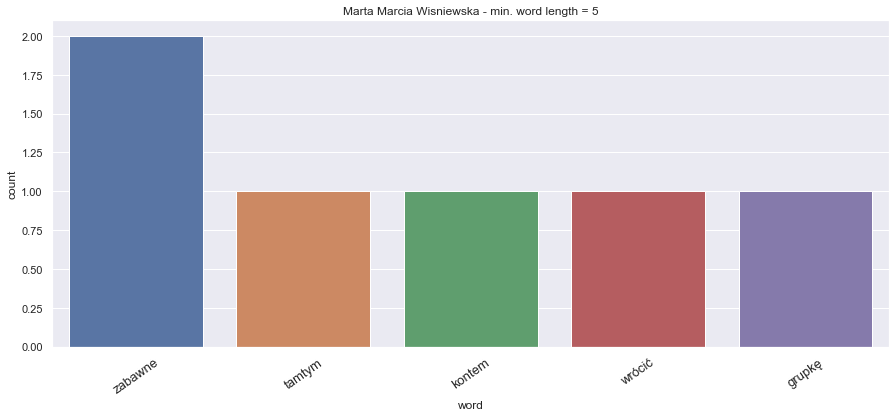

In [6]:
#plt.rcParams.update({'font.size': 30})
sns.set(rc={'figure.figsize':(15,6)})
plt.rc('xtick', labelsize=13)
for i,sender in enumerate(word_counts_filtered):
    df = pd.DataFrame(word_counts_filtered[sender].items())
    df.columns = ['word', 'count']
    plt.figure(i)
    ax = sns.barplot(y='count', x='word', data=df[0:20])
    ax.set_xticklabels(ax.get_xticklabels(), rotation =35)
    ax.set_title(f'{sender} - min. word length = {min_word_length}')


In [7]:
kurwas = stats.get_kurwa_coefficients(word_counts, msg_stats, odmiana = True)
kurwas = {k:v * 100 for k,v in sorted(kurwas.items(), key = lambda item: item[1], reverse = True)}
#ignore_index = True w pandas 1.0.0
df = pd.DataFrame(kurwas.items(), columns = ['Sender', 'Kurwas per 100 msgs']).sort_values(by='Kurwas per 100 msgs', ascending=False).reset_index(drop = True)
df

,Sender,Kurwas per 100 msgs
0,Bartek Królak,4.825175
1,Maciek Górski,4.475669
2,Kamil Bączek,3.682720
3,Paweł Budniak,3.378434
4,Filip Perzanowski,2.654672
5,Daniel Sypuła,2.341804
6,Jakub Gąsior,2.176332
7,Krzysiek Iwaniuk,1.469194
8,Piotrek Jaworski,1.139574
9,Marta Marcia Wisniewska,0.000000


In [8]:
pcoeffs = stats.get_profanity_coefficients(word_counts, msg_stats)
pcoeffs = {k:v * 100 for k,v  in sorted(pcoeffs.items(), key = lambda item: item[1], reverse = True)}
df = pd.DataFrame(pcoeffs.items(), columns = ['Sender', 'Profanity per 100 msgs'])
df

,Sender,Profanity per 100 msgs
0,Maciek Górski,8.549883
1,Kamil Bączek,8.498584
2,Paweł Budniak,8.142681
3,Bartek Królak,8.041958
4,Filip Perzanowski,6.575126
5,Daniel Sypuła,6.487294
6,Jakub Gąsior,5.951884
7,Piotrek Jaworski,4.454700
8,Krzysiek Iwaniuk,3.270142
9,Marta Marcia Wisniewska,0.000000


<Figure size 720x576 with 0 Axes>

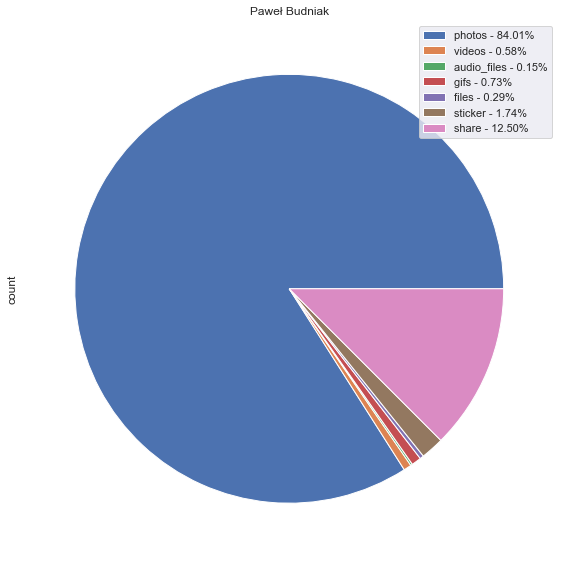

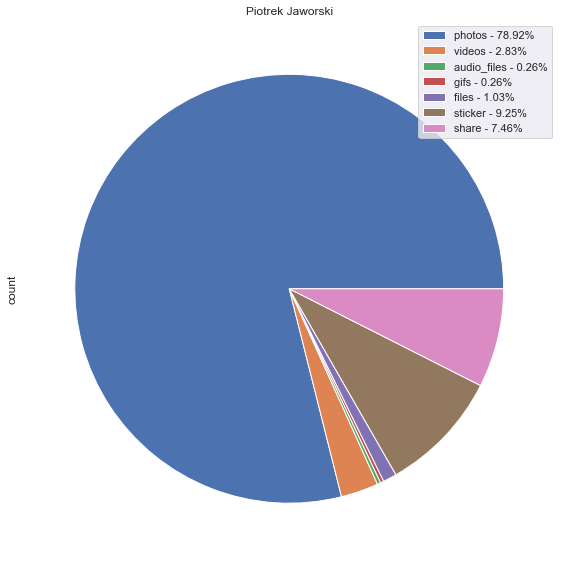

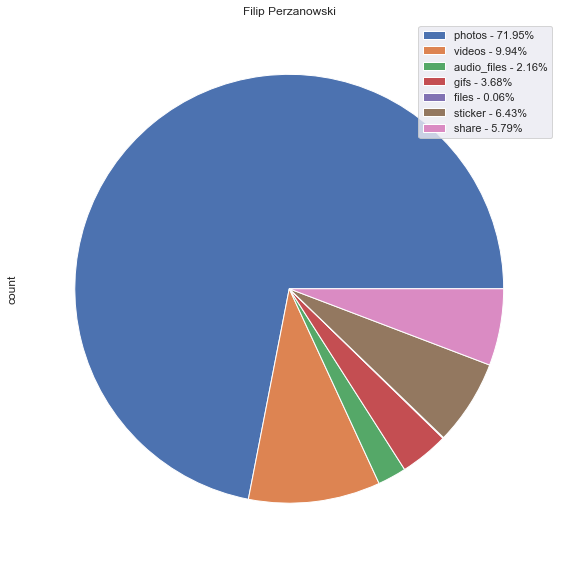

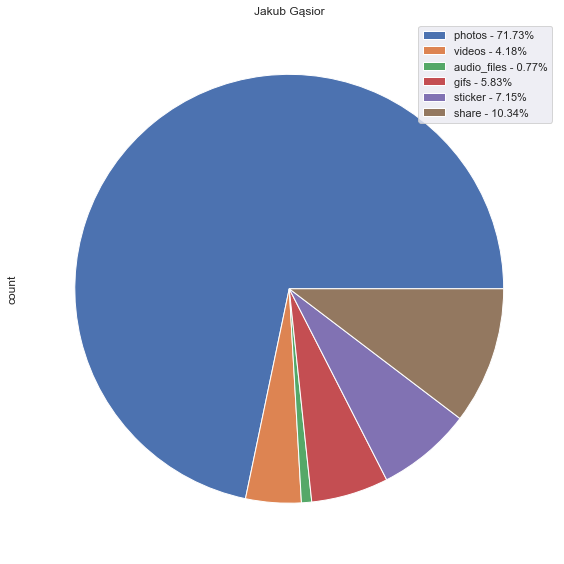

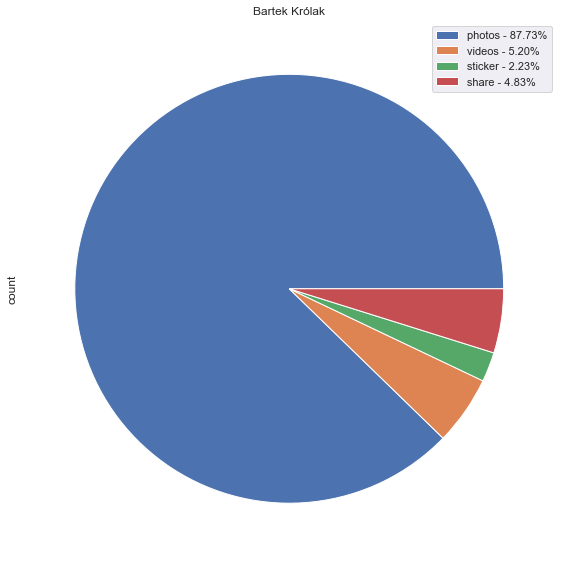

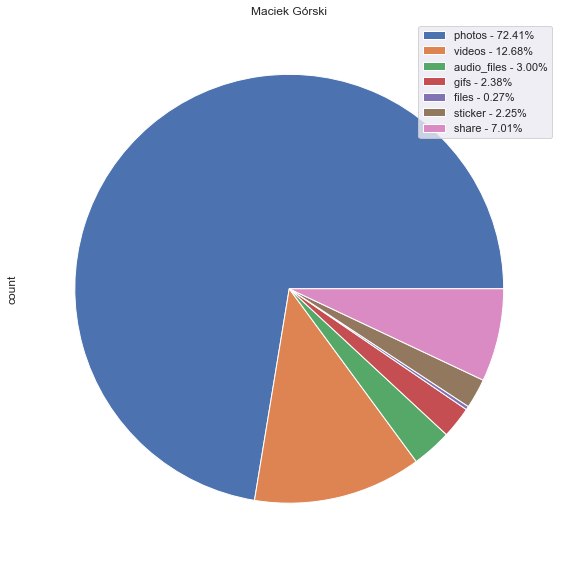

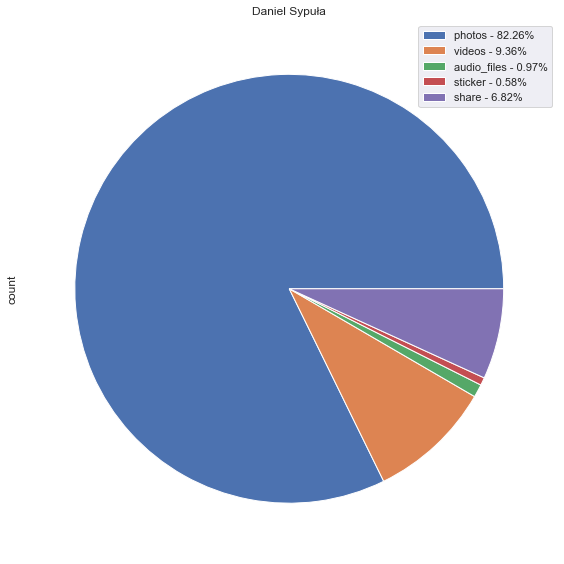

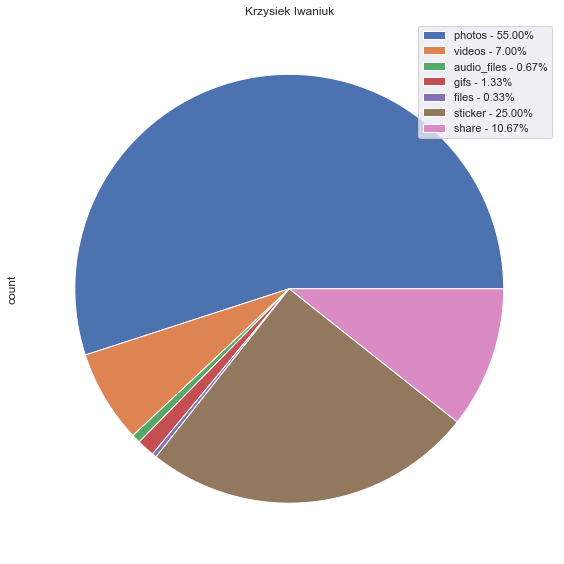

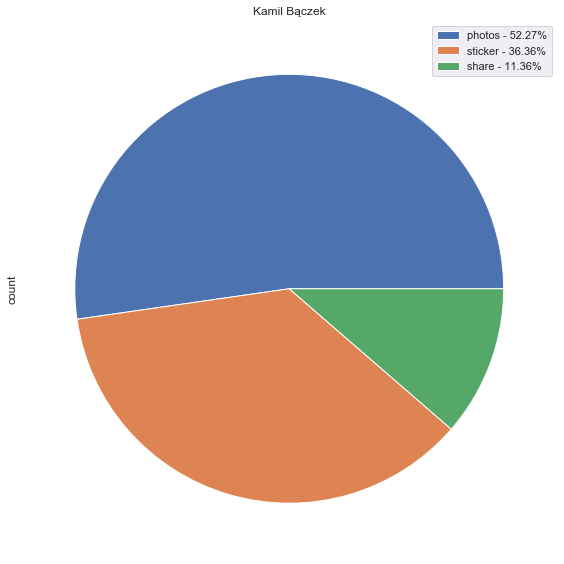

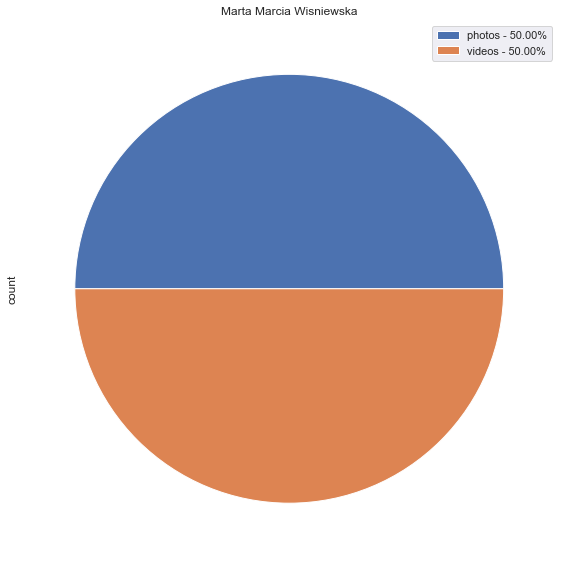

In [5]:
msg_types = stats.get_msg_types(chat, include_txt = False)
for i, sender in enumerate(msg_types):
    plt.figure(i)
    mydf = pd.DataFrame.from_dict(msg_types[sender], orient = 'index', columns = ['count'])
    total = mydf['count'].sum()
    percentages = [t_count/total for t_count in mydf['count']]
    legend = [f'{atype} - {pct:.2%}' for atype, pct in zip(mydf.index, percentages) ]
    ax = mydf.plot.pie(y = 'count', figsize = (8,8), labels = None)
    ax.legend(legend)
    ax.set_title(f'{sender}')
    plt.tight_layout()

In [84]:
from plotly.subplots import make_subplots
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objects as go
import plotly.express as px
import math
init_notebook_mode(connected=True)

msg_types = stats.get_msg_types(chat, include_txt = False)

msg_types.pop('Marta Marcia Wisniewska', None)

fig = make_subplots(
    rows=math.ceil(len(msg_types)/2),
    cols=2,
    subplot_titles=tuple(msg_types.keys()),
    specs =[[{'type':'domain'}]*2]*(math.ceil(len(msg_types)/2))
)
for i,sender in enumerate(msg_types):
    mydf = pd.DataFrame.from_dict(msg_types[sender], orient = 'index', columns = ['count'])
#     total = mydf['count'].sum()
#     percentages = [t_count/total for t_count in mydf['count']]
#     legend = [f'{atype} - {pct:.2%}' for atype, pct in zip(mydf.index, percentages) ]
#     ax = mydf.plot.pie(y = 'count', figsize = (8,8), labels = None)
#     ax.legend(legend)
#     ax.set_title(f'{sender}')
#     plt.tight_layout()(i)%(math.ceil(len(msg_types)/2))+1
    #print(mydf)
    f = px.pie(mydf, values = 'count', names = mydf.index)#, names='country', title='Population of European continent')
    fig.add_trace(f.data[0], row = math.ceil((i+1)/2), col = (i)%2+1) #ehhhhhhh
fig.update_layout(height=2500, width=900)
fig.show()

In [10]:
pd.DataFrame(msg_types)

,Paweł Budniak,Piotrek Jaworski,Filip Perzanowski,Jakub Gąsior,Bartek Królak,Maciek Górski,Daniel Sypuła,Krzysiek Iwaniuk,Kamil Bączek,Marta Marcia Wisniewska
photos,578,307,1231,652.0,236.0,3254,422.0,165,23.0,1.0
videos,4,11,170,38.0,14.0,570,48.0,21,NaN,1.0
audio_files,1,1,37,7.0,NaN,135,5.0,2,NaN,NaN
gifs,5,1,63,53.0,NaN,107,NaN,4,NaN,NaN
files,2,4,1,NaN,NaN,12,NaN,1,NaN,NaN
sticker,12,36,110,65.0,6.0,101,3.0,75,16.0,NaN
share,86,29,99,94.0,13.0,315,35.0,32,5.0,NaN


D:\Anaconda\lib\site-packages\seaborn\relational.py:792: FutureWarning: Converting timezone-aware DatetimeArray to timezone-naive ndarray with 'datetime64[ns]' dtype. In the future, this will return an ndarray with 'object' dtype where each element is a 'pandas.Timestamp' with the correct 'tz'.
	To accept the future behavior, pass 'dtype=object'.
	To keep the old behavior, pass 'dtype="datetime64[ns]"'.
  x, y = np.asarray(x), np.asarray(y)


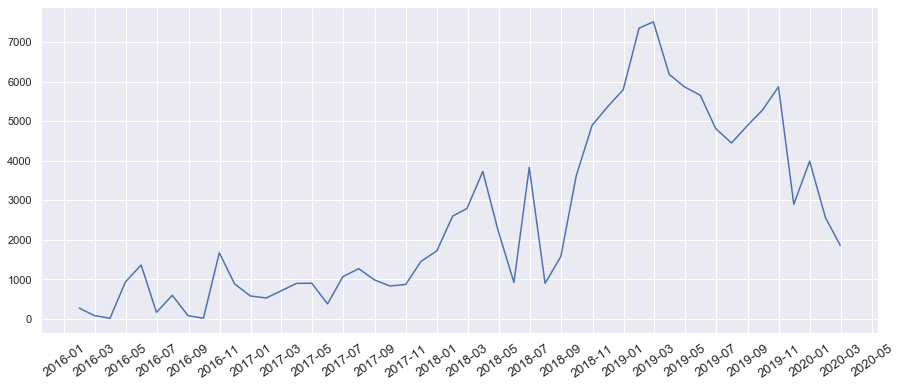

In [11]:
dates = stats.groupby_date(chat, 'M')
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates


ax = sns.lineplot(data=dates)
#sns.set(rc={'figure.figsize':(12,12)})
plt.xticks(rotation=35)

date_form = DateFormatter("%Y-%m")
ax.xaxis.set_major_formatter(date_form)
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=2))
ax

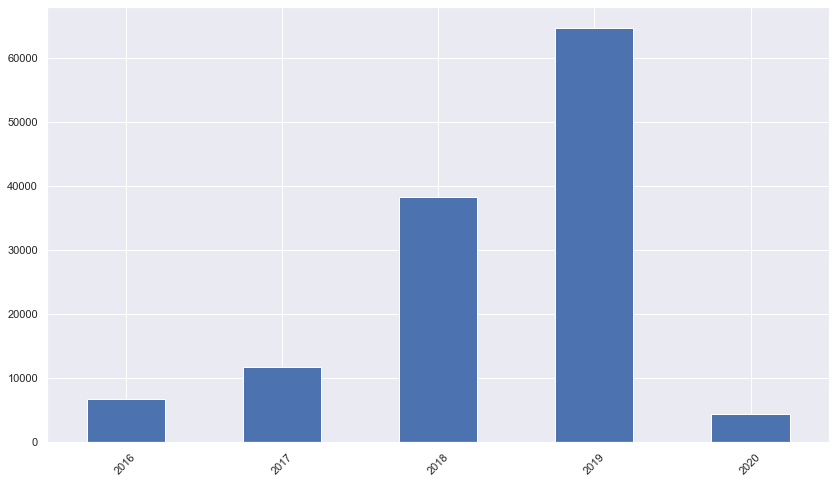

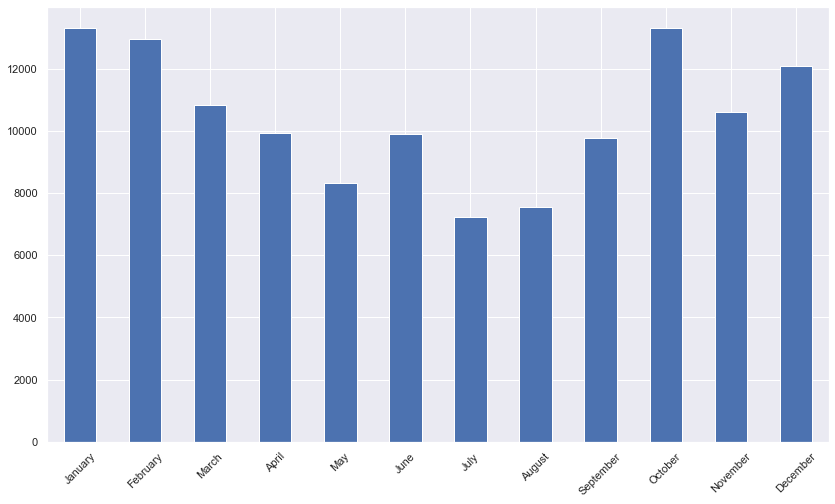

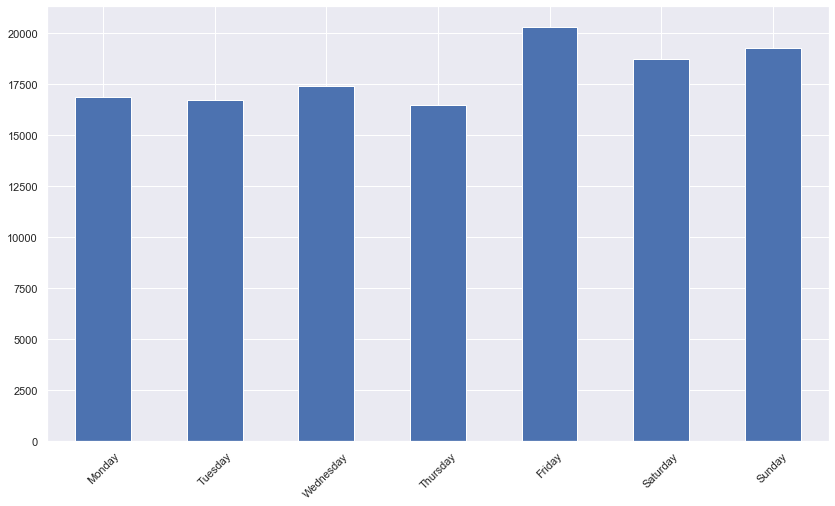

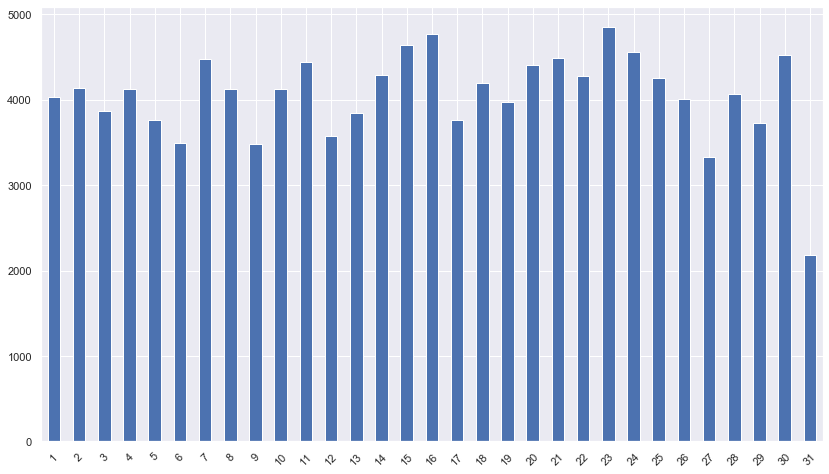

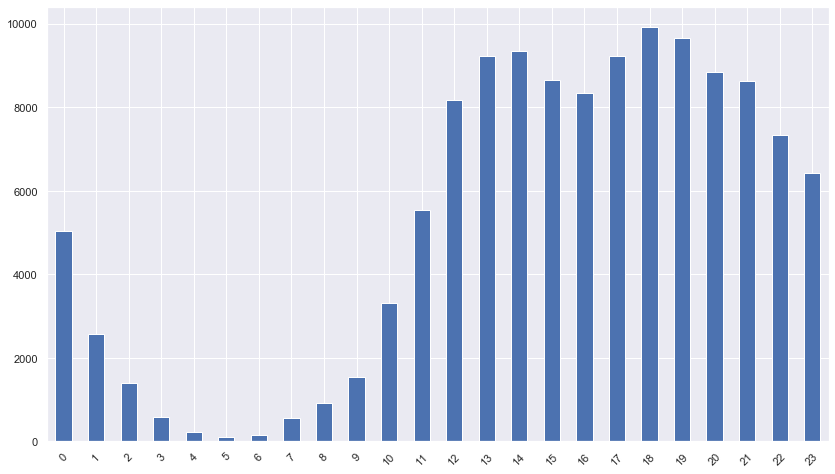

In [104]:
intervals = ['y', 'm', 'w', 'd', 'h']
for i, interval in enumerate (intervals):
    plt.figure(i)
    counts_by_time = stats.groupby_time(chat, interval, interval_names = True)
    counts_by_time.plot(kind='bar', rot = 45, figsize = (14,8))
plt.show()

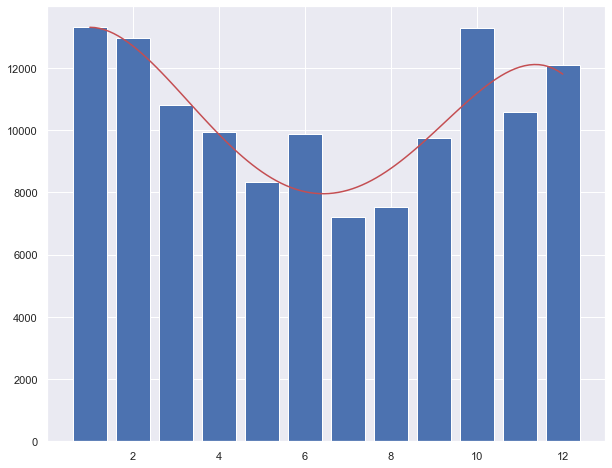

In [105]:
import numpy as np

counts_by_time = stats.groupby_time(chat, 'M', interval_names = False)
counts = np.array(counts_by_time)
intervals = np.array(counts_by_time.index)
poly4 = np.poly1d(np.polyfit(intervals, counts, 4))
poly4
xp = np.linspace(intervals[0], intervals[-1], 100)
plt.bar(counts_by_time.index, counts_by_time)
plt.plot(xp, poly4(xp), c='r')
plt.show()

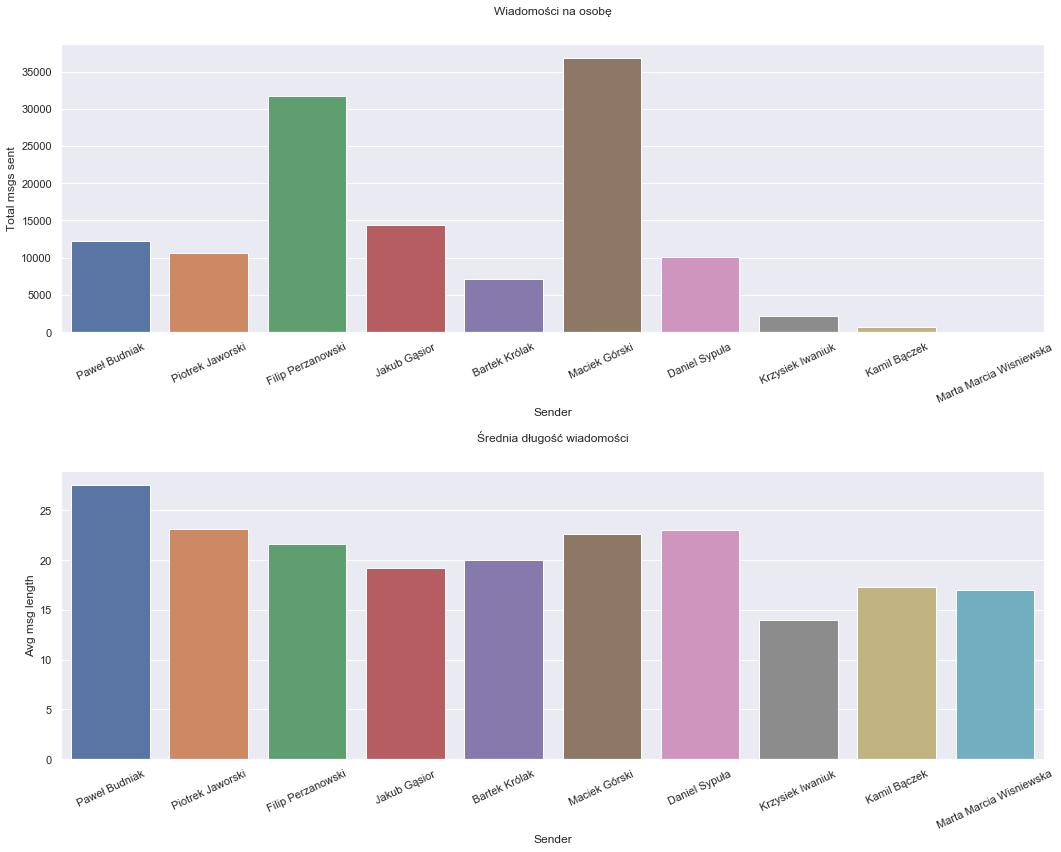

In [87]:
msg_stats = stats.get_msg_stats(chat)
df = pd.DataFrame(((k,*v) for k,v in msg_stats.items()))
df.columns = ['Sender', 'Total msgs sent', 'Avg msg length', 'Total chars sent']
df
fig, axs = plt.subplots(2,1, figsize = (15,12))
sns.barplot(y = 'Total msgs sent', x = 'Sender', data =df, ax = axs[0])
axs[0].set_xticklabels(axs[0].get_xticklabels(), rotation = 25)
axs[0].set_title('Wiadomości na osobę\n\n')
sns.barplot(y = 'Avg msg length', x = 'Sender', data = df, ax = axs[1])
axs[1].set_title('Średnia długość wiadomości\n\n')                                                                    
axs[1].set_xticklabels(axs[1].get_xticklabels(), rotation = 25)
fig.tight_layout()
plt.show()

In [88]:
# nickname_sets = ['set the nickname', 'set his own nickname', 'set your nickname']
# new_chat = chat[chat['content'].map(lambda msg: pd.isna(msg) or (all(nick_set not in msg for nick_set in nickname_sets)))]
# new_chat.head()

In [89]:
# new_counts = stats.get_word_counts(new_chat)
# new_counts['Filip Perzanowski']['pierdziano']

In [92]:
used, received = stats.reaction_stats(chat)
used

,👍,😍,😮,😆,😠,👎,😢,❤,total,most_used
Paweł Budniak,149.0,39.0,72.0,41.0,28.0,52.0,36.0,6.0,423.0,👍
Piotrek Jaworski,126.0,126.0,49.0,56.0,15.0,44.0,72.0,NaN,488.0,👍
Filip Perzanowski,153.0,92.0,53.0,78.0,32.0,67.0,53.0,NaN,528.0,👍
Jakub Gąsior,231.0,114.0,178.0,42.0,30.0,74.0,88.0,NaN,757.0,👍
Bartek Królak,69.0,58.0,48.0,103.0,14.0,10.0,19.0,NaN,321.0,😆
Maciek Górski,143.0,132.0,20.0,17.0,22.0,87.0,26.0,NaN,447.0,👍
Daniel Sypuła,79.0,71.0,89.0,137.0,13.0,9.0,56.0,6.0,460.0,😆
Krzysiek Iwaniuk,26.0,23.0,4.0,20.0,1.0,2.0,8.0,NaN,84.0,👍
Kamil Bączek,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN
Marta Marcia Wisniewska,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN


In [93]:
total = pd.DataFrame.from_dict(stats.total_reacts(chat), orient = 'index')

In [94]:
ser = pd.Series(stats.total_reacts(chat))

In [95]:
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

init_notebook_mode(connected=True)

import plotly.express as px

#data_canada = px.data.gapminder().query("country == 'Canada'")
fig = px.bar(x=ser.index, y=ser, color=ser.index)
fig.show()

In [124]:
percents = received.copy()
for index, row in percents.iterrows():
    n_msgs = msg_stats[index][0]
    percents.loc[index, :-1] = row[:-1]/n_msgs # slice np.array = kopia
percents.sort_values(by='😍', inplace = True)
percents.fillna(0)
percents[percents.columns[:-1]] = percents[percents.columns[:-1]].fillna(0).applymap(lambda x: f'{x:.2%}')
#percents[percents.columns[:-1]] = 
percents

,👍,😮,😍,😠,👎,😆,😢,❤,total,most_received
Krzysiek Iwaniuk,0.28%,0.47%,0.38%,0.09%,0.14%,0.19%,0.09%,0.00%,1.66%,😮
Filip Perzanowski,0.59%,0.43%,0.39%,0.09%,0.22%,0.20%,0.31%,0.00%,2.23%,👍
Piotrek Jaworski,1.05%,0.46%,0.40%,0.12%,0.45%,0.28%,0.21%,0.01%,2.99%,👍
Maciek Górski,0.59%,0.33%,0.49%,0.12%,0.18%,0.42%,0.27%,0.01%,2.41%,👍
Paweł Budniak,1.31%,0.48%,0.52%,0.21%,0.48%,0.91%,0.23%,0.02%,4.17%,👍
Bartek Królak,0.48%,0.52%,0.52%,0.04%,0.25%,0.29%,0.17%,0.00%,2.27%,😮
Daniel Sypuła,0.78%,0.47%,0.55%,0.10%,0.43%,0.26%,0.33%,0.01%,2.92%,👍
Jakub Gąsior,1.27%,0.37%,1.01%,0.18%,0.27%,0.58%,0.45%,0.03%,4.16%,👍
Kamil Bączek,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,NaN
Marta Marcia Wisniewska,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,0.00%,NaN


In [122]:
files = ['message_1.json', 'message_12.json', 'message_93.json', 'massage_43.json', 'dupa']
from re import match
good = [file for file in files if match('message_[0-9]+.json', file)]
good

['message_1.json', 'message_12.json', 'message_93.json']

In [121]:
def get_most(df, title, emoji):
    who = df[emoji].idxmax()
    print(f'The most {title} person is {who}: {df.loc[who, emoji]} \'{emoji}\' received')
def get_most_percent(df, title, emoji):
    who = df[emoji].map(lambda x: float(x.rstrip('%'))).idxmax() #cast percentages to float so that max index can be computed
    print(f'The most {title} person is {who}: {df.loc[who, emoji]} of his messages receive \'{emoji}\' ')
get_most(received, 'funny', '😆')
get_most(received, 'hated', '👎')
get_most(received, 'upvoted', '👍')
get_most(received, 'infuriating', '😠')
get_most_percent(percents, 'funny', '😆')

The most funny person is Maciek Górski: 155.0 '😆' received
The most hated person is Filip Perzanowski: 69.0 '👎' received
The most upvoted person is Maciek Górski: 216.0 '👍' received
The most infuriating person is Maciek Górski: 45.0 '😠' received
The most funny person is Paweł Budniak: 0.91% of his messages receive '😆' 
